In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

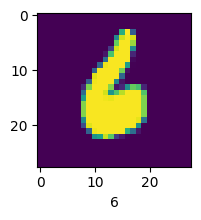

In [9]:
plot_sample(X_train, y_train, 1337)

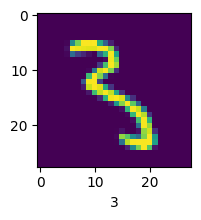

In [10]:
plot_sample(X_train, y_train, 228)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2654 - accuracy: 0.9175
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1051 - accuracy: 0.9686
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0771 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0684 - accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0589 - accuracy: 0.9827


In [22]:
y_pred = cnn.predict(X_test)
y_pred

313/313 [==============================] - 2s 5ms/step


array([[2.5430271e-11, 9.0494527e-09, 7.5220079e-08, ..., 9.9999964e-01,
        4.0076875e-10, 1.7054836e-07],
       [1.7852886e-07, 1.1665206e-04, 9.9988317e-01, ..., 1.4484977e-11,
        2.2339584e-08, 3.3982525e-13],
       [3.5276502e-09, 9.9999738e-01, 1.0343610e-08, ..., 1.4860188e-07,
        5.6313255e-08, 6.5452199e-09],
       ...,
       [6.1125059e-12, 2.5976829e-07, 2.9327298e-11, ..., 1.5458811e-07,
        1.1323576e-06, 3.0498711e-07],
       [3.7090853e-09, 1.4610913e-11, 7.8905849e-12, ..., 1.8554501e-10,
        1.6016934e-04, 3.3494001e-07],
       [5.4105760e-07, 5.2562465e-09, 1.5015931e-07, ..., 2.4446782e-14,
        2.6561271e-08, 9.5343460e-13]], dtype=float32)

In [23]:
def cnn_predict(index):
    plt.figure(figsize=(10, 2))
    plt.imshow(X_test[index])
    plt.xlabel(f'pred: {np.argmax(y_pred[index])}\nfact: {y_test[index]}')

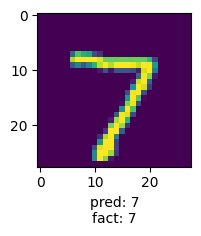

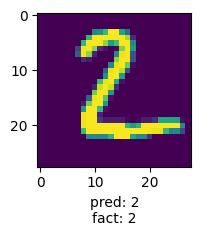

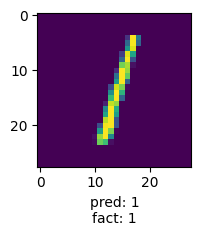

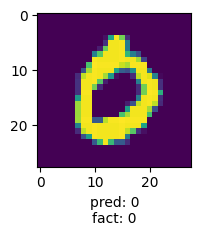

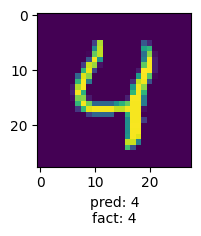

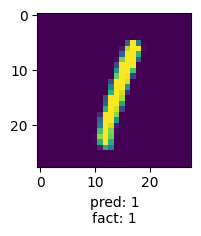

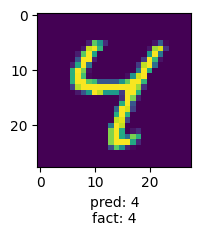

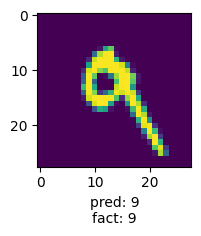

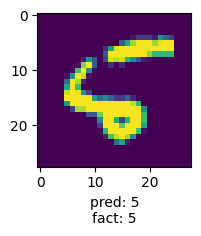

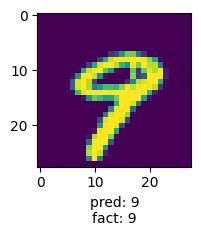

In [24]:
for i in range(10):
    cnn_predict(i)

In [26]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0294 - accuracy: 0.9900


[0.029395243152976036, 0.9900000095367432]

313/313 [==============================] - 1s 5ms/step


Text(95.72222222222221, 0.5, 'Truth')

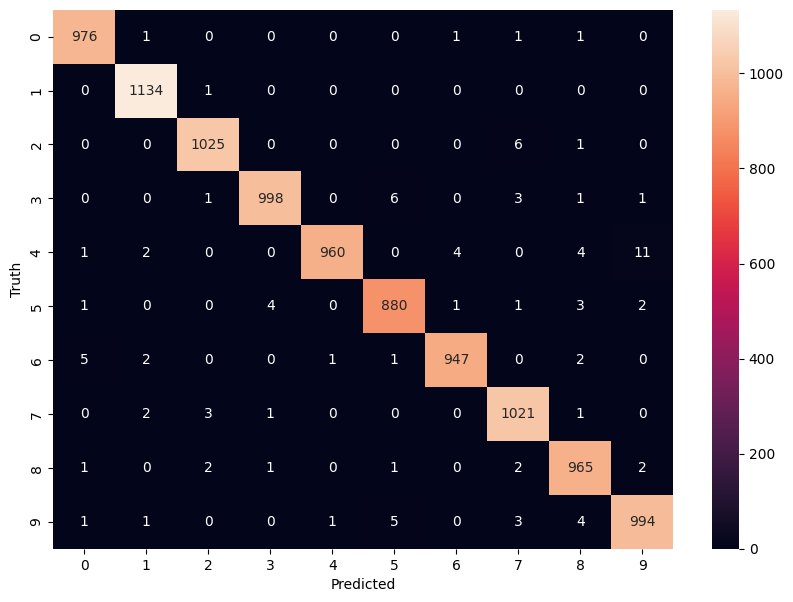

In [28]:
import seaborn as sn

y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

